In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
df = pd.read_csv("/gdrive/MyDrive/Miuul/2-Feature Engineering/Case_Study_2/Telco-Customer-Churn.csv")

#Görev 1 : Keşifçi Veri Analizi

##Adım 1:Genel resmi inceleyiniz.

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


##Adım 2: Numerik ve kategorik değişkenleri yakalayınız.

In [ ]:
def grab_cols(dataframe, cat_th = 10, car_th = 20):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O" ]

  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]

  cat_cols = cat_cols + num_but_cat

  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes !="O"]

  num_cols = [col for col in num_cols if col not in num_but_cat]

  return num_cols, cat_cols, cat_but_car

In [ ]:
num_cols, cat_cols, cat_but_car = grab_cols(df)

In [ ]:
num_cols

['tenure', 'MonthlyCharges']

In [ ]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [ ]:
cat_but_car

['customerID', 'TotalCharges']

In [ ]:
#num_cols.append("TotalCharges")
#cat_but_car.remove("TotalCharges")

In [ ]:
#df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], downcast="float")

In [ ]:
df["TotalCharges"][488]

' '

-TotalCharges ta nan değer yerine boşluk değeri içeren satırlar var bu durum diğerlerindede geçerli olabilir!!!!!!!!!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##Adım 3:  Numerik ve kategorik değişkenlerin analizini yapınız.

In [ ]:
df[cat_cols].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0


In [ ]:
def plot_count(dataframe, col):
  sns.countplot(x = dataframe[col], data = dataframe)
  plt.show()

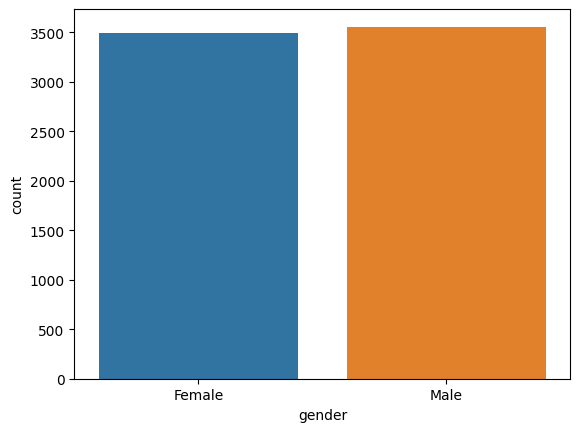

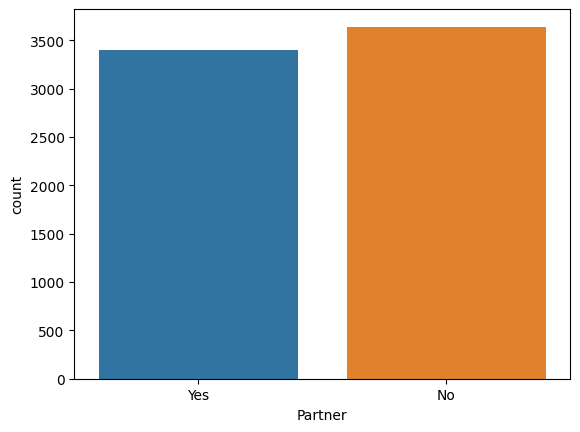

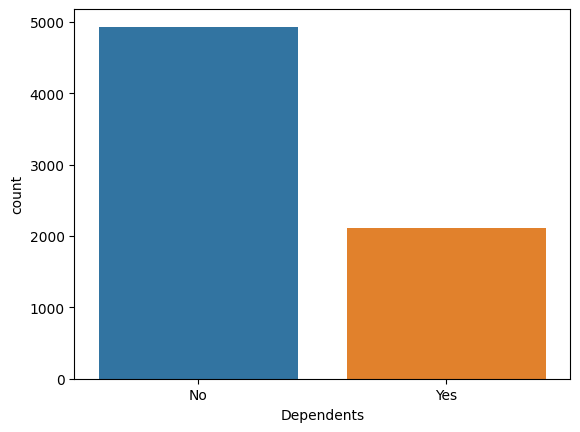

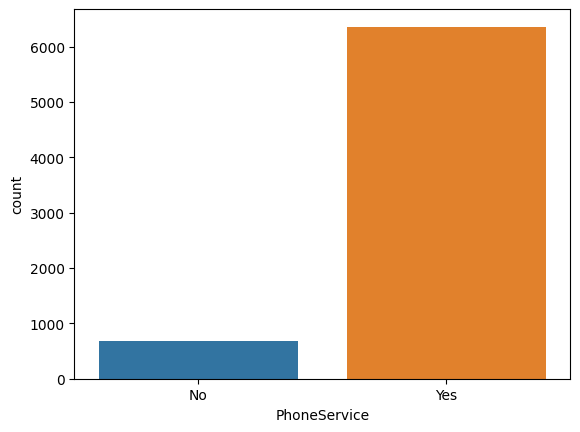

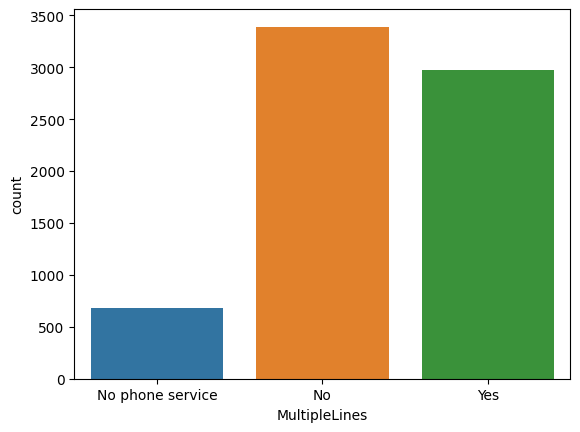

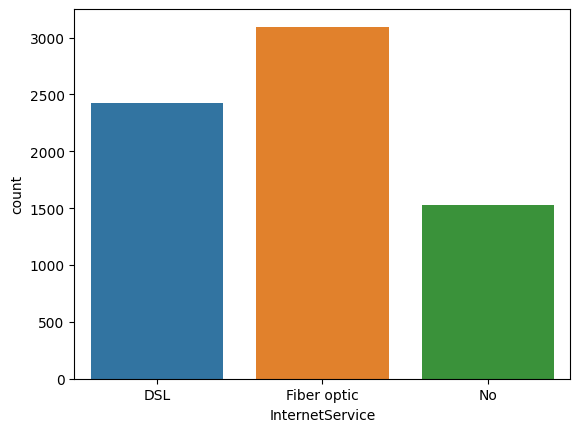

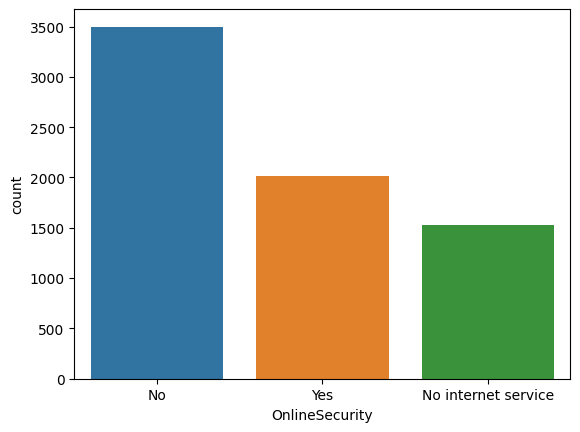

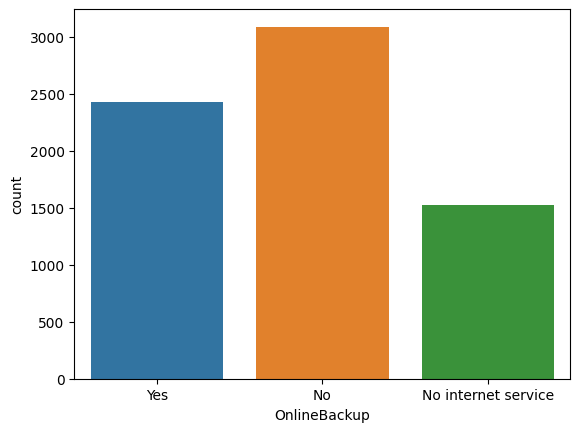

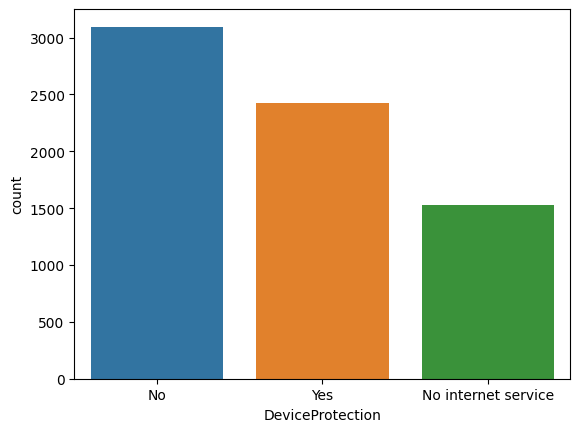

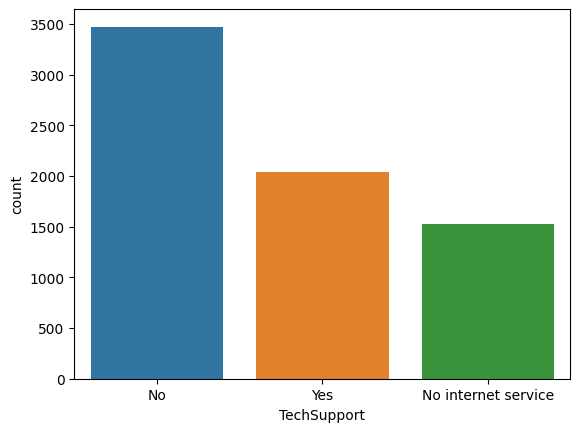

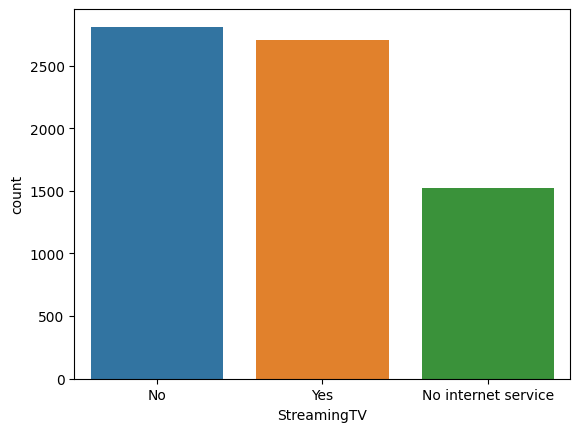

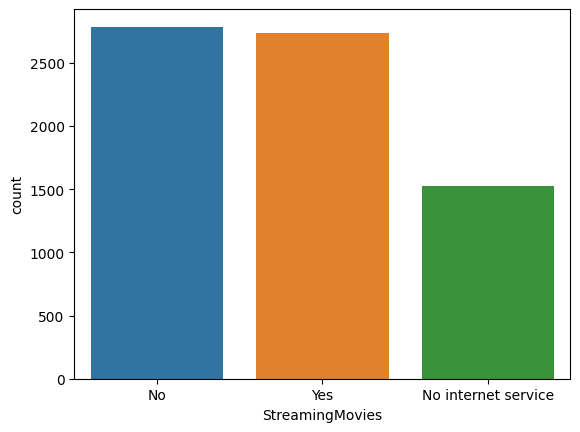

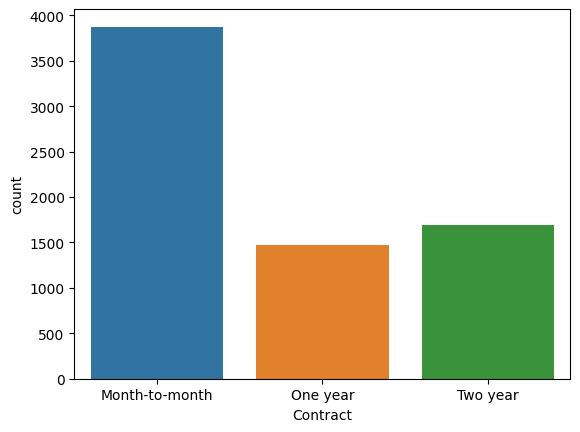

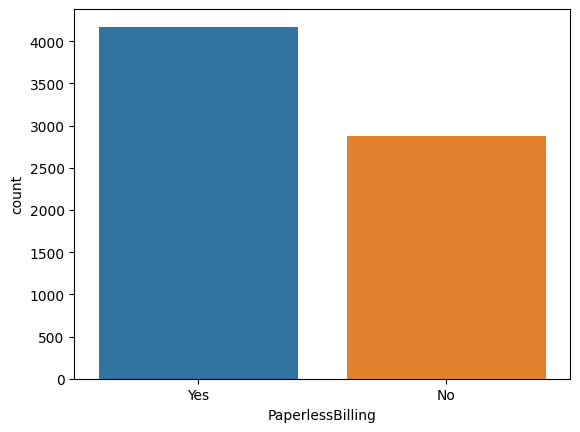

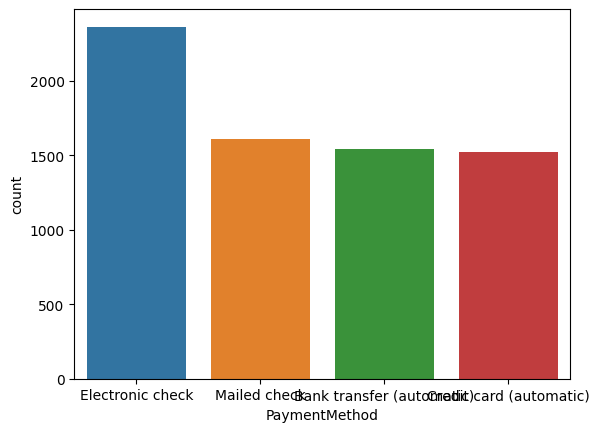

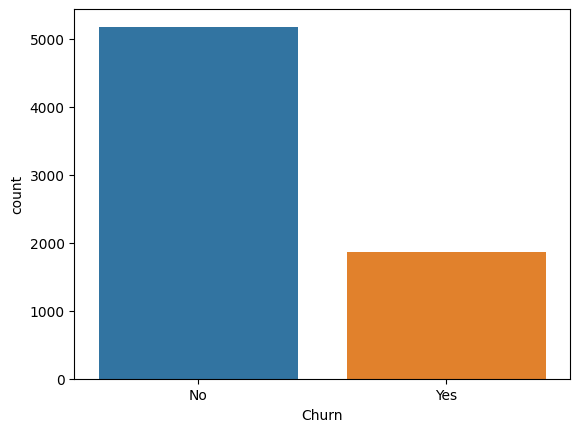

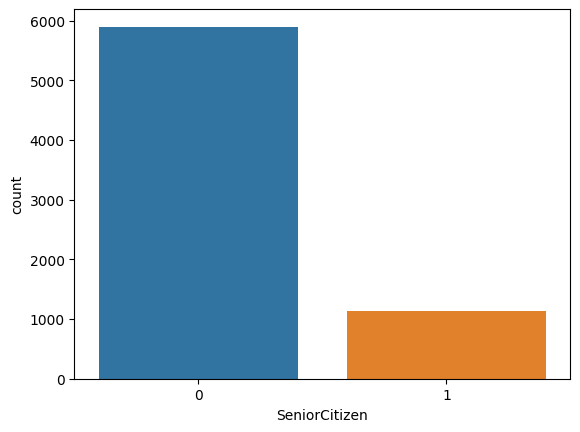

In [ ]:
for col in cat_cols:
  plot_count(df, col)

-Yaşlı olan çok fazla kişi yok.

-PhoneService olmayan çok az kişi var buda MultipleLines ı etkiliyor.

In [ ]:
df[num_cols].head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [ ]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


-Tenure 0 olması durumu şirkette yeni başlamıştır veya bir Nan değeri olabilir.

In [ ]:
df["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

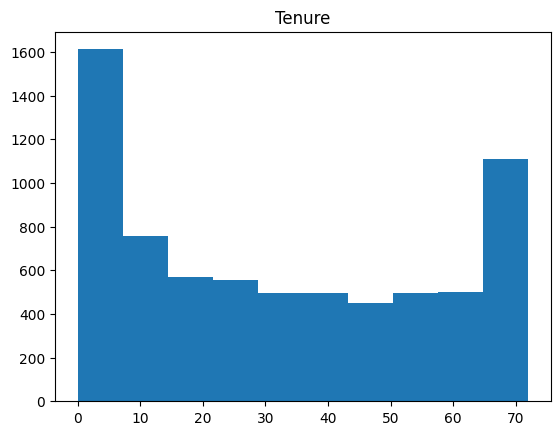

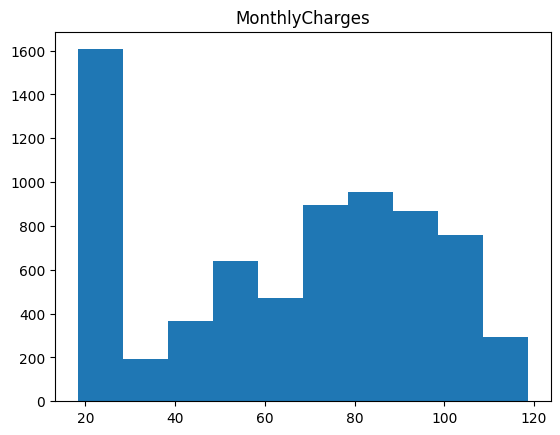

In [ ]:
plt.title("Tenure")
plt.hist(df["tenure"])
plt.show()

plt.title("MonthlyCharges")
plt.hist(df["MonthlyCharges"])
plt.show()

##Adım 4:Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre numerik değişkenlerin ortalaması)

In [ ]:
for col in num_cols:
  print(df.groupby("Churn").agg({col:"mean"}))

          tenure
Churn           
No     37.569965
Yes    17.979133
       MonthlyCharges
Churn                
No          61.265124
Yes         74.441332


-Şirkette kalanların ay ortalaması 17 iken kalmayanlar 37

-Kalanlar ile kalmayanların ödediği aylık ödeme neredeyse aynı.

In [ ]:
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])

In [ ]:
#df.head()

In [ ]:
for col in cat_cols:
  print(df.groupby(col).agg({"Churn":"mean"}))
  print("#################")

           Churn
gender          
Female  0.269209
Male    0.261603
#################
            Churn
Partner          
No       0.329580
Yes      0.196649
#################
               Churn
Dependents          
No          0.312791
Yes         0.154502
#################
                 Churn
PhoneService          
No            0.249267
Yes           0.267096
#################
                     Churn
MultipleLines             
No                0.250442
No phone service  0.249267
Yes               0.286099
#################
                    Churn
InternetService          
DSL              0.189591
Fiber optic      0.418928
No               0.074050
#################
                        Churn
OnlineSecurity               
No                   0.417667
No internet service  0.074050
Yes                  0.146112
#################
                        Churn
OnlineBackup                 
No                   0.399288
No internet service  0.074050
Yes                  0.

##Adım 5: Aykırı gözlem analizi yapınız.

In [ ]:
df["Churn"] = le.inverse_transform(df["Churn"])

In [ ]:
def plot_boxplot(dataframe, col):
  sns.boxplot(x=df["Churn"], y=df[col])
  plt.show()

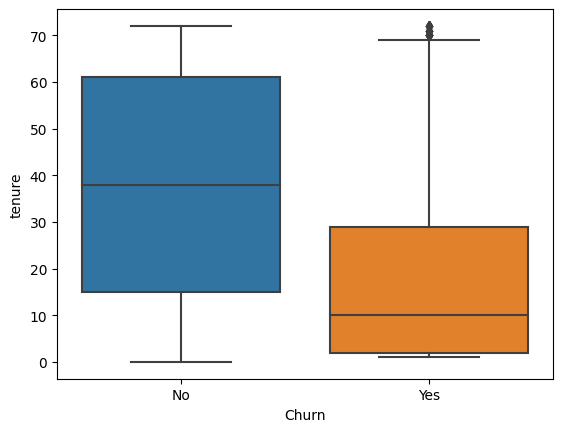

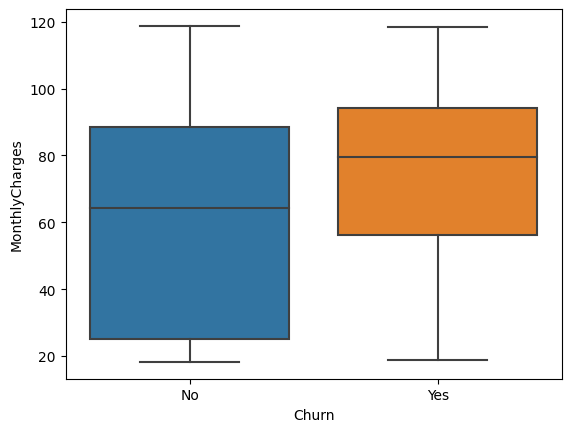

In [ ]:
for col in num_cols:
  plot_boxplot(df, col)

In [ ]:
def outlier_threshold(dataframe, col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)

  iqr = quartile3 - quartile1

  up_limit = quartile3 + 1.5 * iqr
  low_limit = quartile1 - 1.5 * iqr

  return up_limit, low_limit

In [ ]:
def check_outlier(dataframe, col_name):
  up_limit, low_limit = outlier_threshold(dataframe, col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [ ]:
cat_but_car

['customerID', 'TotalCharges']

##Adım 6: Eksik gözlem analizi yapınız.

-Eksik değer göze çarpmıyor fakat yukarıda yakaladığımız TotalCharges içindeki " " içeren boş değerleri yakalamak lazım.

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
(df[df.columns] == " ").sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
(df[df.columns] == 0).sum()


customerID             0
gender                 0
SeniorCitizen       5901
Partner                0
Dependents             0
tenure                11
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

##Adım7: Korelasyon analizi yapınız.

In [ ]:
df.corr()

<ipython-input-955-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


#Görev 2 : Feature Engineering

##Adım 1:  Eksik ve aykırı gözlemler için gerekli işlemleri yapınız.

###Missing Values

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
(df[df.columns] == " ").sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.loc[(df["TotalCharges"] == " ")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
nan_index = df.loc[df["TotalCharges"] == " "].index

In [ ]:
nan_index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:
monthly_charges = df.iloc[nan_index]["MonthlyCharges"].values

In [ ]:
df.loc[nan_index, "TotalCharges"] = monthly_charges

In [ ]:
df.iloc[nan_index]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.7,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [ ]:
df[df["TotalCharges"] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


----------
###Outlier

In [ ]:
num_cols.append("TotalCharges")
cat_but_car.remove("TotalCharges")

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80


In [ ]:
for col in num_cols:
  print(col+":", check_outlier(df, col))

tenure: False
MonthlyCharges: False
TotalCharges: False


##Adım 2: Yeni değişkenler oluşturunuz.

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df["tenure_cat"] = ["Short-term" if value <= 9  else "Mid-term" if value >9  and value <30  else "Long-term" for value in df["tenure"]]

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cat
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Short-term
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Long-term
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Short-term
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Long-term
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Short-term


In [ ]:
df["tenure_year"] = [value//12 if(value % 12 == 0) else np.floor(value // 12) for value in df["tenure"]]

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cat,tenure_year
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Short-term,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Long-term,2.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Short-term,0.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Long-term,3.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Short-term,0.0


##Adım 3:  Encoding işlemlerini gerçekleştiriniz.

In [ ]:
num_cols, cat_cols, cat_but_car = grab_cols(df)

In [ ]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_cat',
 'SeniorCitizen',
 'tenure_year']

In [ ]:
num_cols.append("tenure_year")
cat_cols.remove("tenure_year")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cat,tenure_year
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Short-term,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Long-term,2.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Short-term,0.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Long-term,3.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Short-term,0.0


In [ ]:
cat_but_car

['customerID']

In [ ]:
df["Churn"] = le.fit_transform(df["Churn"])

In [ ]:
def rare_analyser(dataframe, target, cat_cols):
  for col in cat_cols:
    print(col,":", len(dataframe[col].value_counts()))
    print(pd.DataFrame({"Count": dataframe[col].value_counts(),
                        "Ratio": dataframe[col].value_counts()/ len(dataframe),
                        "Target_mean": dataframe.groupby(col)[target].mean()}), end="\n\n")

In [ ]:
cat_cols.remove("Churn")

In [ ]:
rare_analyser(df, "Churn", cat_cols)

gender : 2
        Count     Ratio  Target_mean
Female   3488  0.495244     0.269209
Male     3555  0.504756     0.261603

Partner : 2
     Count     Ratio  Target_mean
No    3641  0.516967     0.329580
Yes   3402  0.483033     0.196649

Dependents : 2
     Count     Ratio  Target_mean
No    4933  0.700412     0.312791
Yes   2110  0.299588     0.154502

PhoneService : 2
     Count     Ratio  Target_mean
No     682  0.096834     0.249267
Yes   6361  0.903166     0.267096

MultipleLines : 3
                  Count     Ratio  Target_mean
No                 3390  0.481329     0.250442
No phone service    682  0.096834     0.249267
Yes                2971  0.421837     0.286099

InternetService : 3
             Count     Ratio  Target_mean
DSL           2421  0.343746     0.189591
Fiber optic   3096  0.439585     0.418928
No            1526  0.216669     0.074050

OnlineSecurity : 3
                     Count     Ratio  Target_mean
No                    3498  0.496663     0.417667
No intern

In [ ]:
def one_hot_encoder(dataframe, cols):
  dataframe = pd.get_dummies(dataframe, columns = cols, drop_first = True)
  return dataframe

In [ ]:
df = one_hot_encoder(df, cat_cols)

In [ ]:
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,tenure_year,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_cat_Mid-term,tenure_cat_Short-term,SeniorCitizen_1
0,7590-VHVEG,1,29.85,29.85,0,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,2.0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,3668-QPYBK,2,53.85,108.15,1,0.0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
3,7795-CFOCW,45,42.30,1840.75,0,3.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,1,0.0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0


##Adım 4: Numerik değişkenler için standartlaştırma yapınız.

In [ ]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges', 'tenure_year']

In [ ]:
mms = MinMaxScaler()
df[num_cols] = mms.fit_transform(df[num_cols])

In [ ]:
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,tenure_year,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_cat_Mid-term,tenure_cat_Short-term,SeniorCitizen_1
0,7590-VHVEG,0.013889,0.115423,0.001275,0,0.000000,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
1,5575-GNVDE,0.472222,0.385075,0.215867,0,0.333333,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,3668-QPYBK,0.027778,0.354229,0.010310,1,0.000000,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
3,7795-CFOCW,0.625000,0.239303,0.210241,0,0.500000,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,9237-HQITU,0.027778,0.521891,0.015330,1,0.000000,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0


##Adım 5: Model oluşturunuz.

In [ ]:
x = df.drop(["Churn", "customerID"], axis=1)
y = df["Churn"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state = 1)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_pred,y_test)

0.8035967818267865

In [ ]:
#Yeni ürettiğimiz değişkenlerin durumları:
def plot_importance(model, features, num = len(x), save = False):
  feature_imp = pd.DataFrame({"Value":model.feature_importances_, "Feature": features.columns})
  plt.figure(figsize=(10,10))
  sns.set(font_scale=1)
  sns.barplot(x = "Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])

  plt.title("Features")
  plt.tight_layout()
  plt.show()
  if save:
    plt.savefig("importances.png")


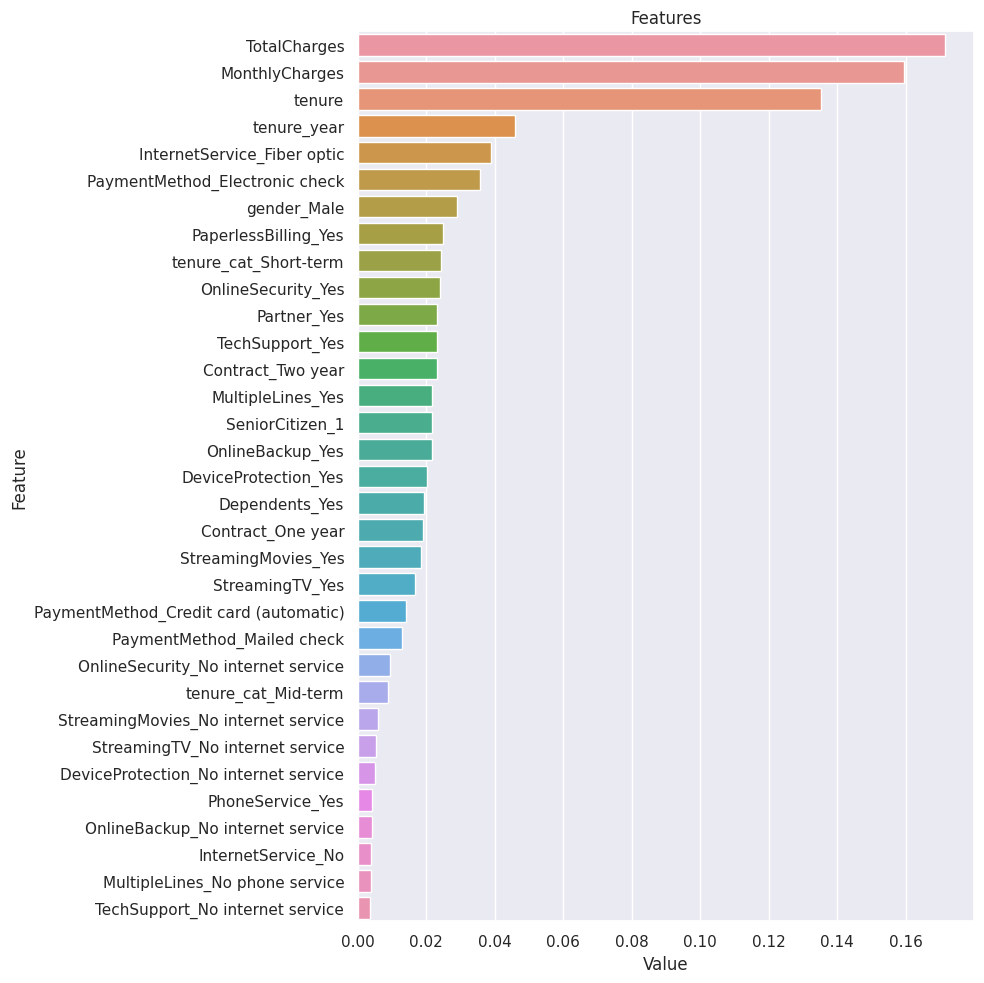

In [ ]:
plot_importance(rf_model, x_train)